In [2]:
library(tidyverse)
tree_data <- read_csv("Sx.htdata.csv")

library(repr)
sxData <- tree_data |>
mutate(
    SITE = SITE,
    PROV = PROV,
    Height = Height,
    live = live,
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Latitude - P_Latitude,
    TX_Long = S_Longitude - P_Longitude,
    TX_Elev = S_Elevation - P_Elevation
) 
#head(tree_data)
glimpse(sxData)
colnames(sxData)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 3240 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SITE
dbl (19): PROV, BLOCK, TREE, S_MAT, S_MCMT, S_MAP, S_MSP, S_Latitude, S_Long...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 3,240
Columns: 27
$ SITE        <chr> "MID", "MID", "MID", "MID", "MID", "MID", "MID", "MID", "M…
$ PROV        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3…
$ BLOCK       <dbl> 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4…
$ TREE        <dbl> 6, 4, 9, 9, 5, 1, 5, 7, 8, 4, 3, 2, 6, 7, 1, 3, 8, 2, 8, 1…
$ S_MAT       <dbl> 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9…
$ S_MCMT      <dbl> -12.9, -12.9, -12.9, -12.9, -12.9, -12.9, -12.9, -12.9, -1…
$ S_MAP       <dbl> 565, 565, 565, 565, 565, 565, 565, 565, 565, 565, 565, 565…
$ S_MSP       <dbl> 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247…
$ S_Latitude  <dbl> 54.19948, 54.19948, 54.19948, 54.19948, 54.19948, 54.19948…
$ S_Longitude <dbl> -125.002, -125.002, -125.002, -125.002, -125.002, -125.002…
$ S_Elevation <dbl> 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670…
$ P_MAT       <dbl> -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2…
$ P_MCMT      <d

[1] "SITE"        "PROV"        "BLOCK"       "TREE"        "S_MAT"      
 [6] "S_MCMT"      "S_MAP"       "S_MSP"       "S_Latitude"  "S_Longitude"
[11] "S_Elevation" "P_MAT"       "P_MCMT"      "P_MAP"       "P_MSP"      
[16] "P_Elevation" "P_Latitude"  "P_Longitude" "Height"      "live"       
[21] "TX_MAP"      "TX_MSP"      "TX_MCMT"     "TX_MAT"      "TX_Lat"     
[26] "TX_Long"     "TX_Elev"

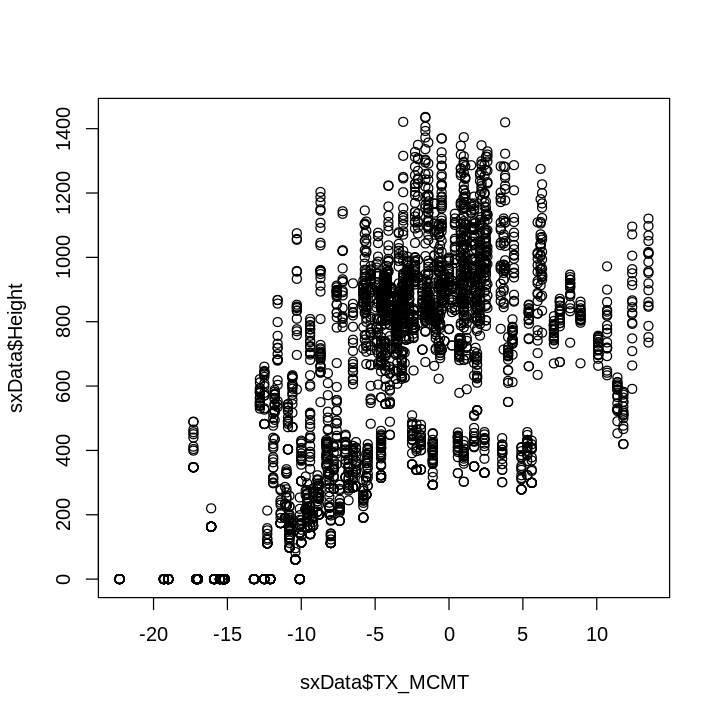

In [2]:
options(repr.plot.width = 6, repr.plot.height = 6)
plot(sxData$TX_MCMT, sxData$Height)

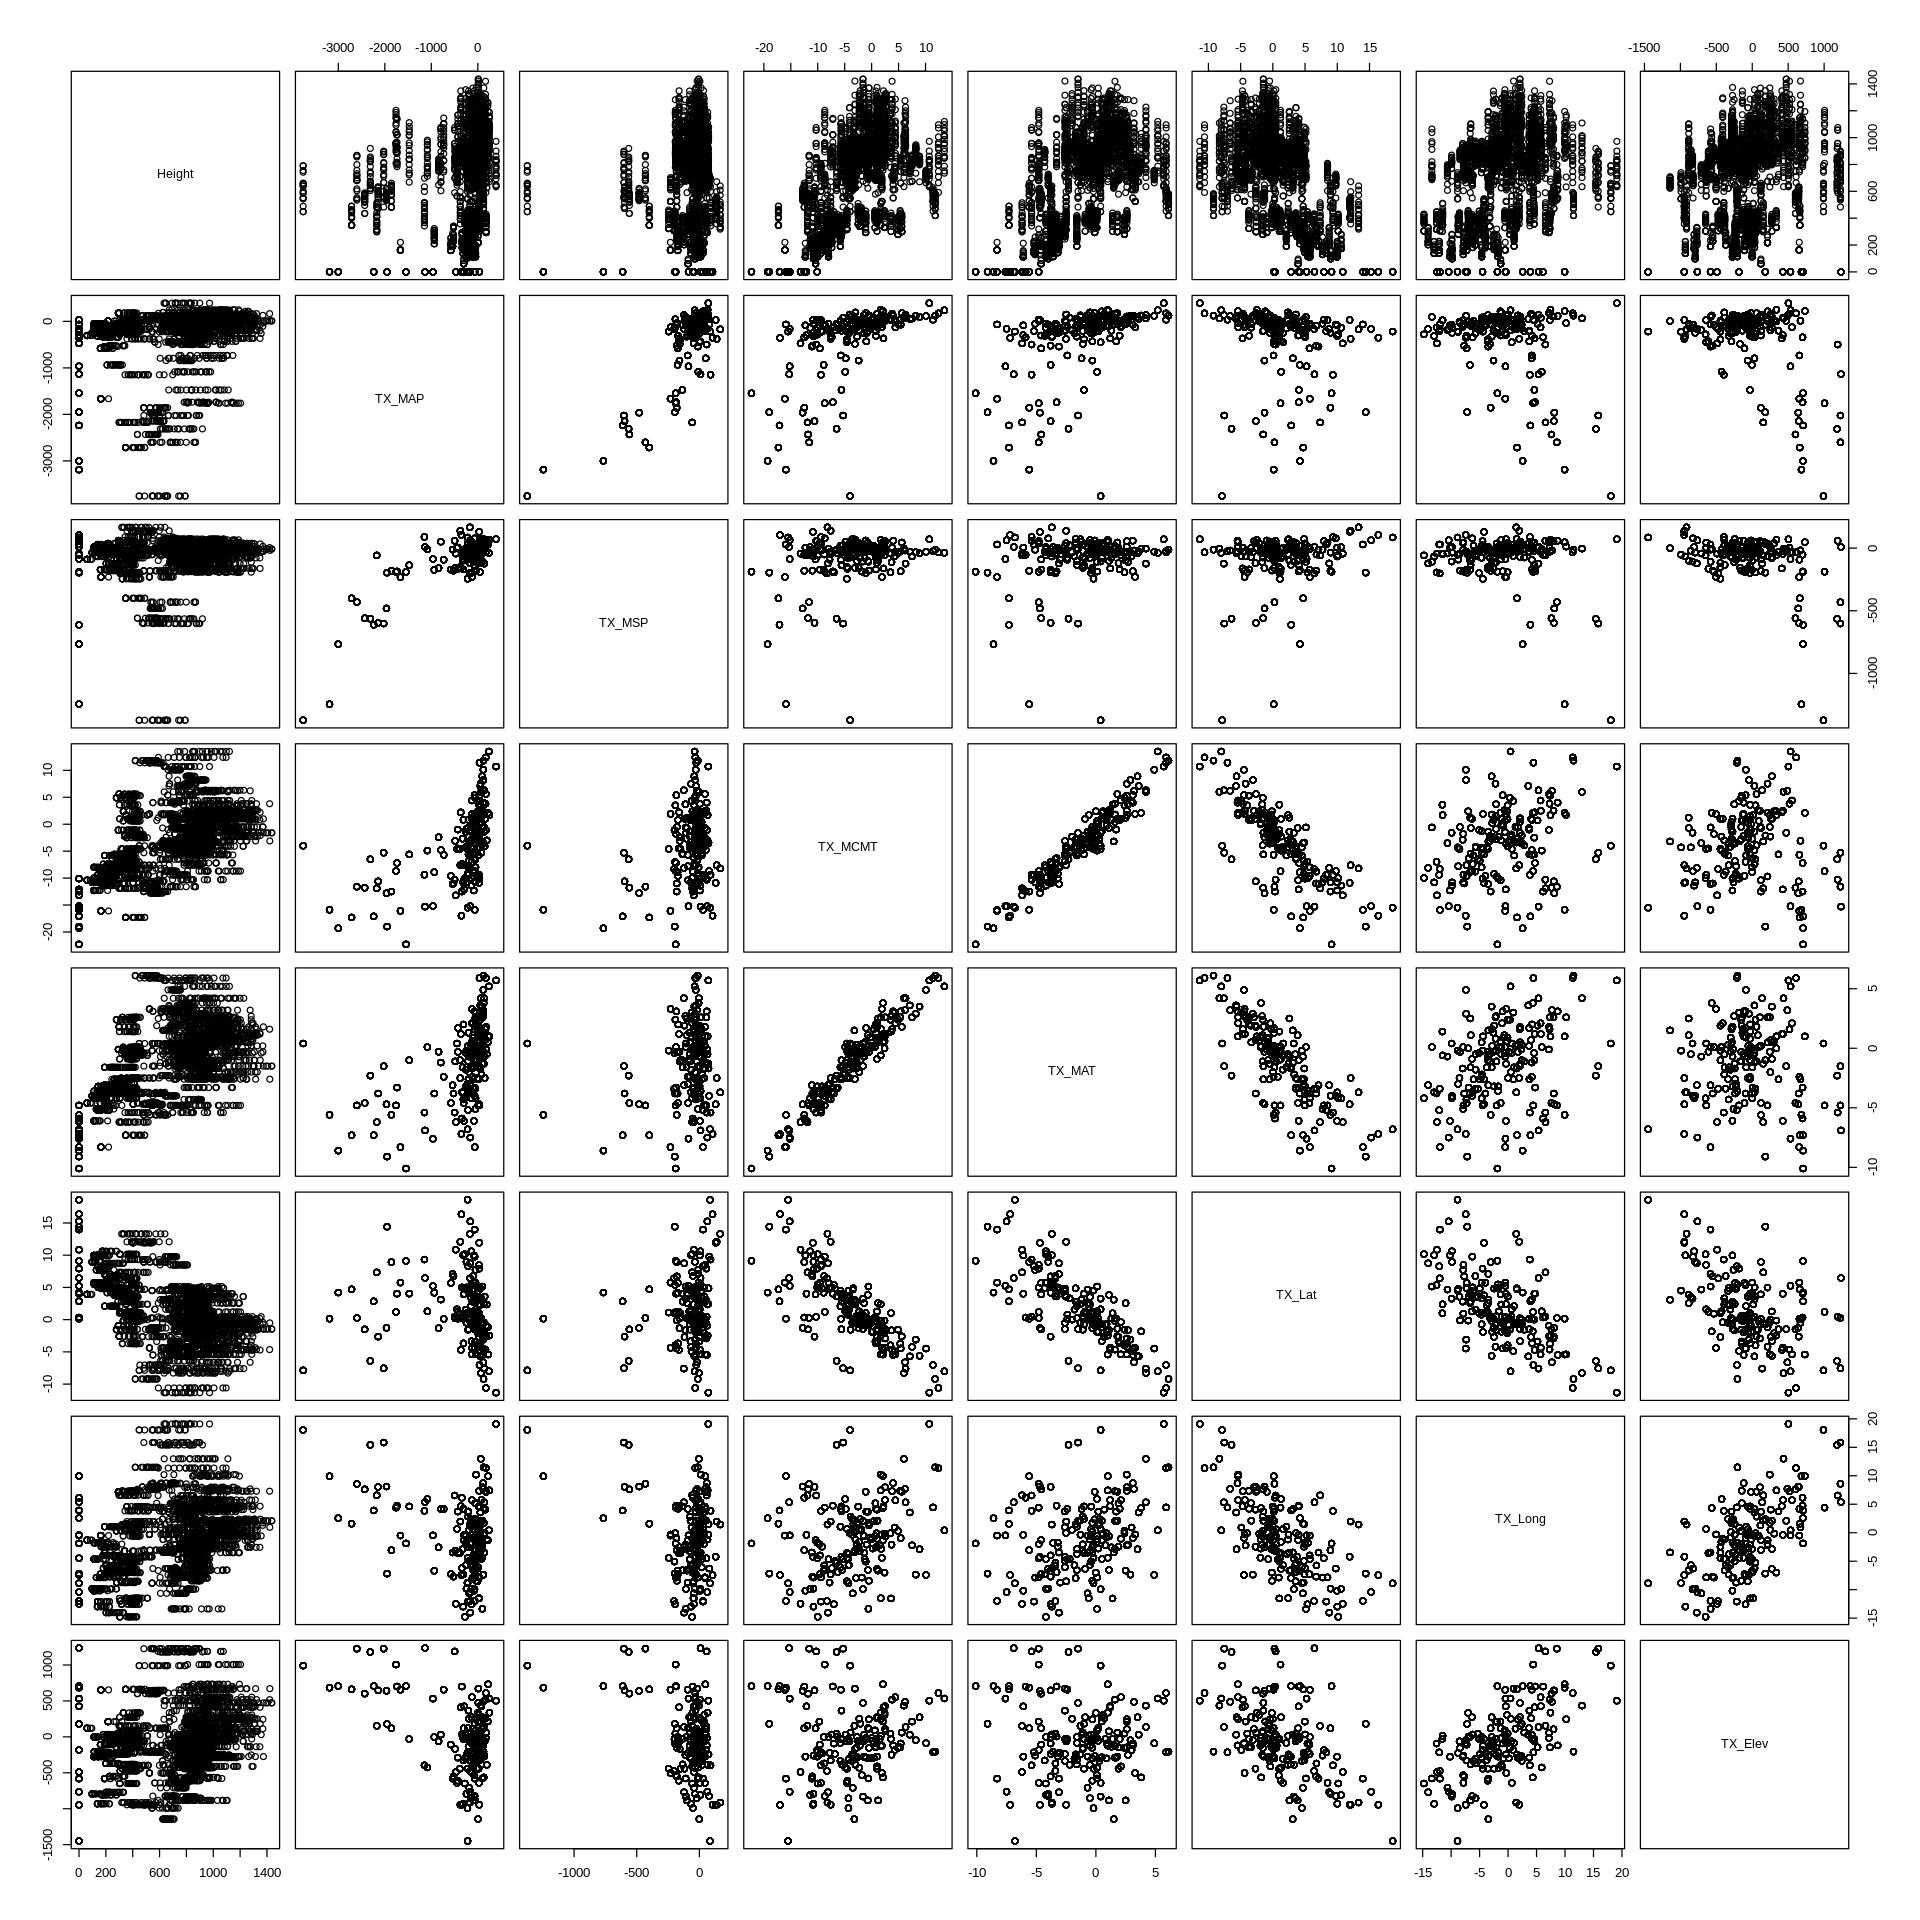

In [3]:
options(repr.plot.width = 16, repr.plot.height = 16)
pairs(~ Height + TX_MAP + TX_MSP + TX_MCMT + TX_MAT + TX_Lat + TX_Long + TX_Elev, data = sxData)

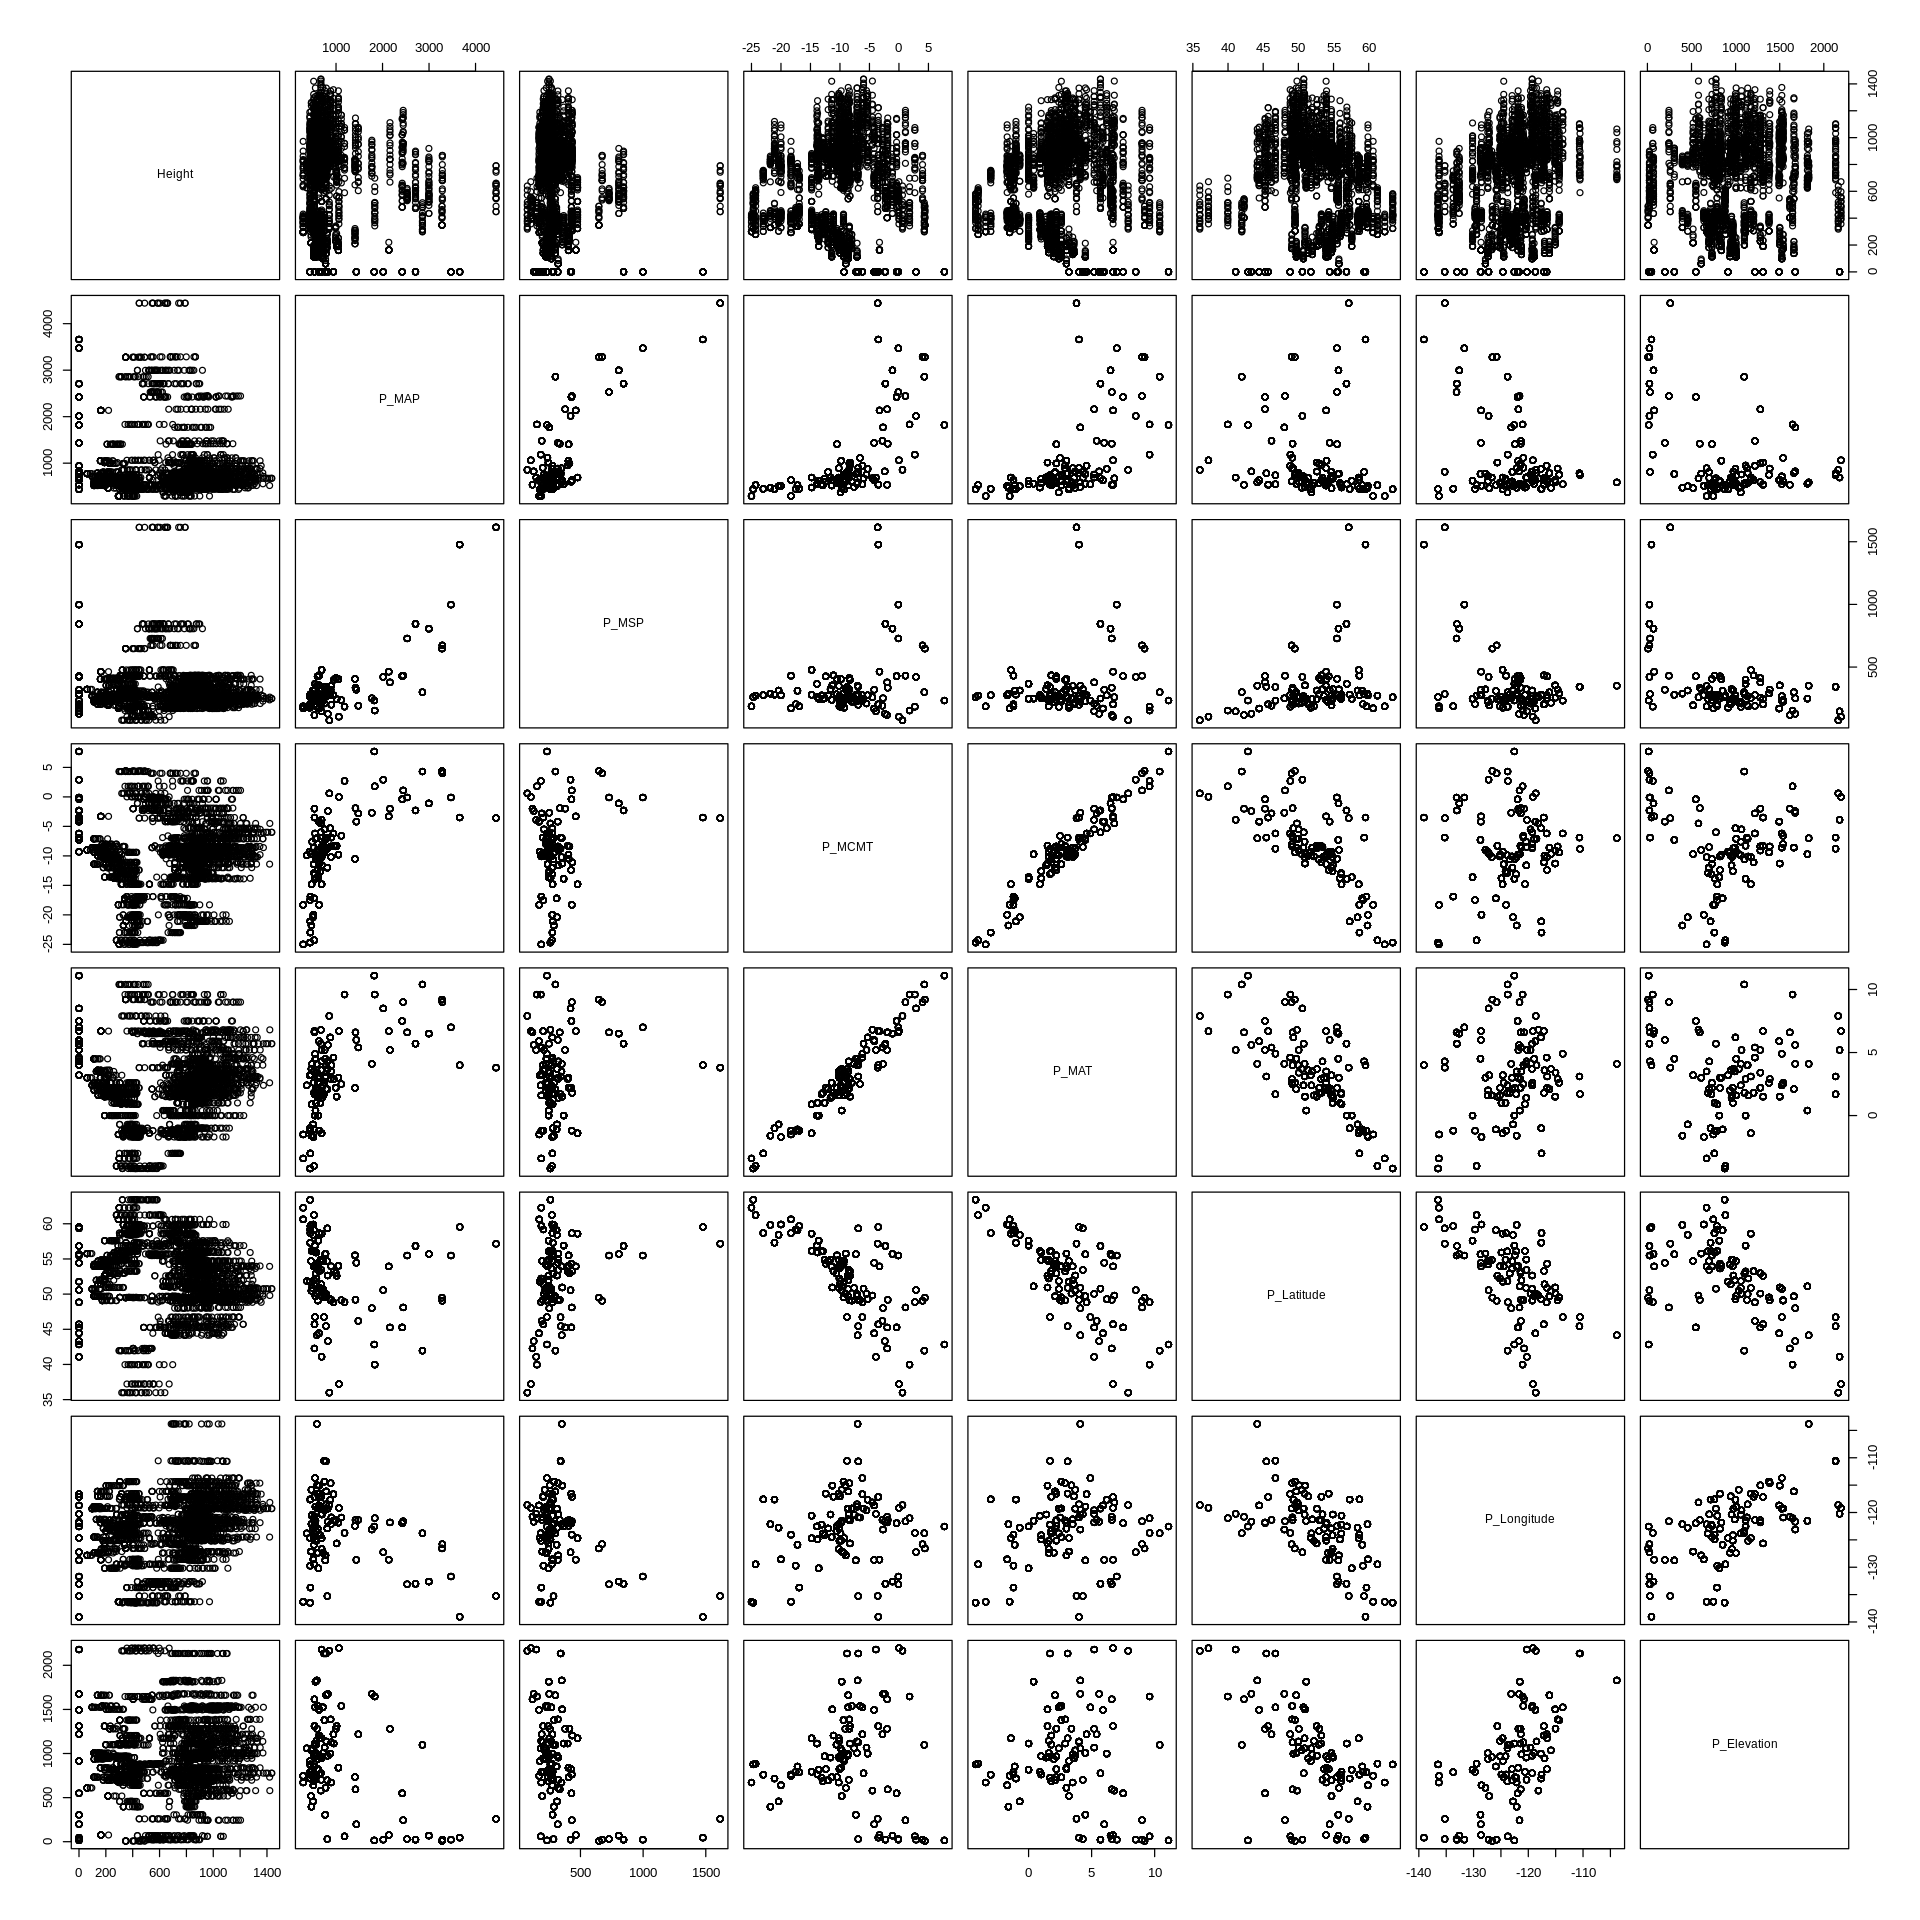

In [11]:
pairs(~ Height + P_MAP + P_MSP + P_MCMT + P_MAT + P_Latitude + P_Longitude + P_Elevation, data = sxData)

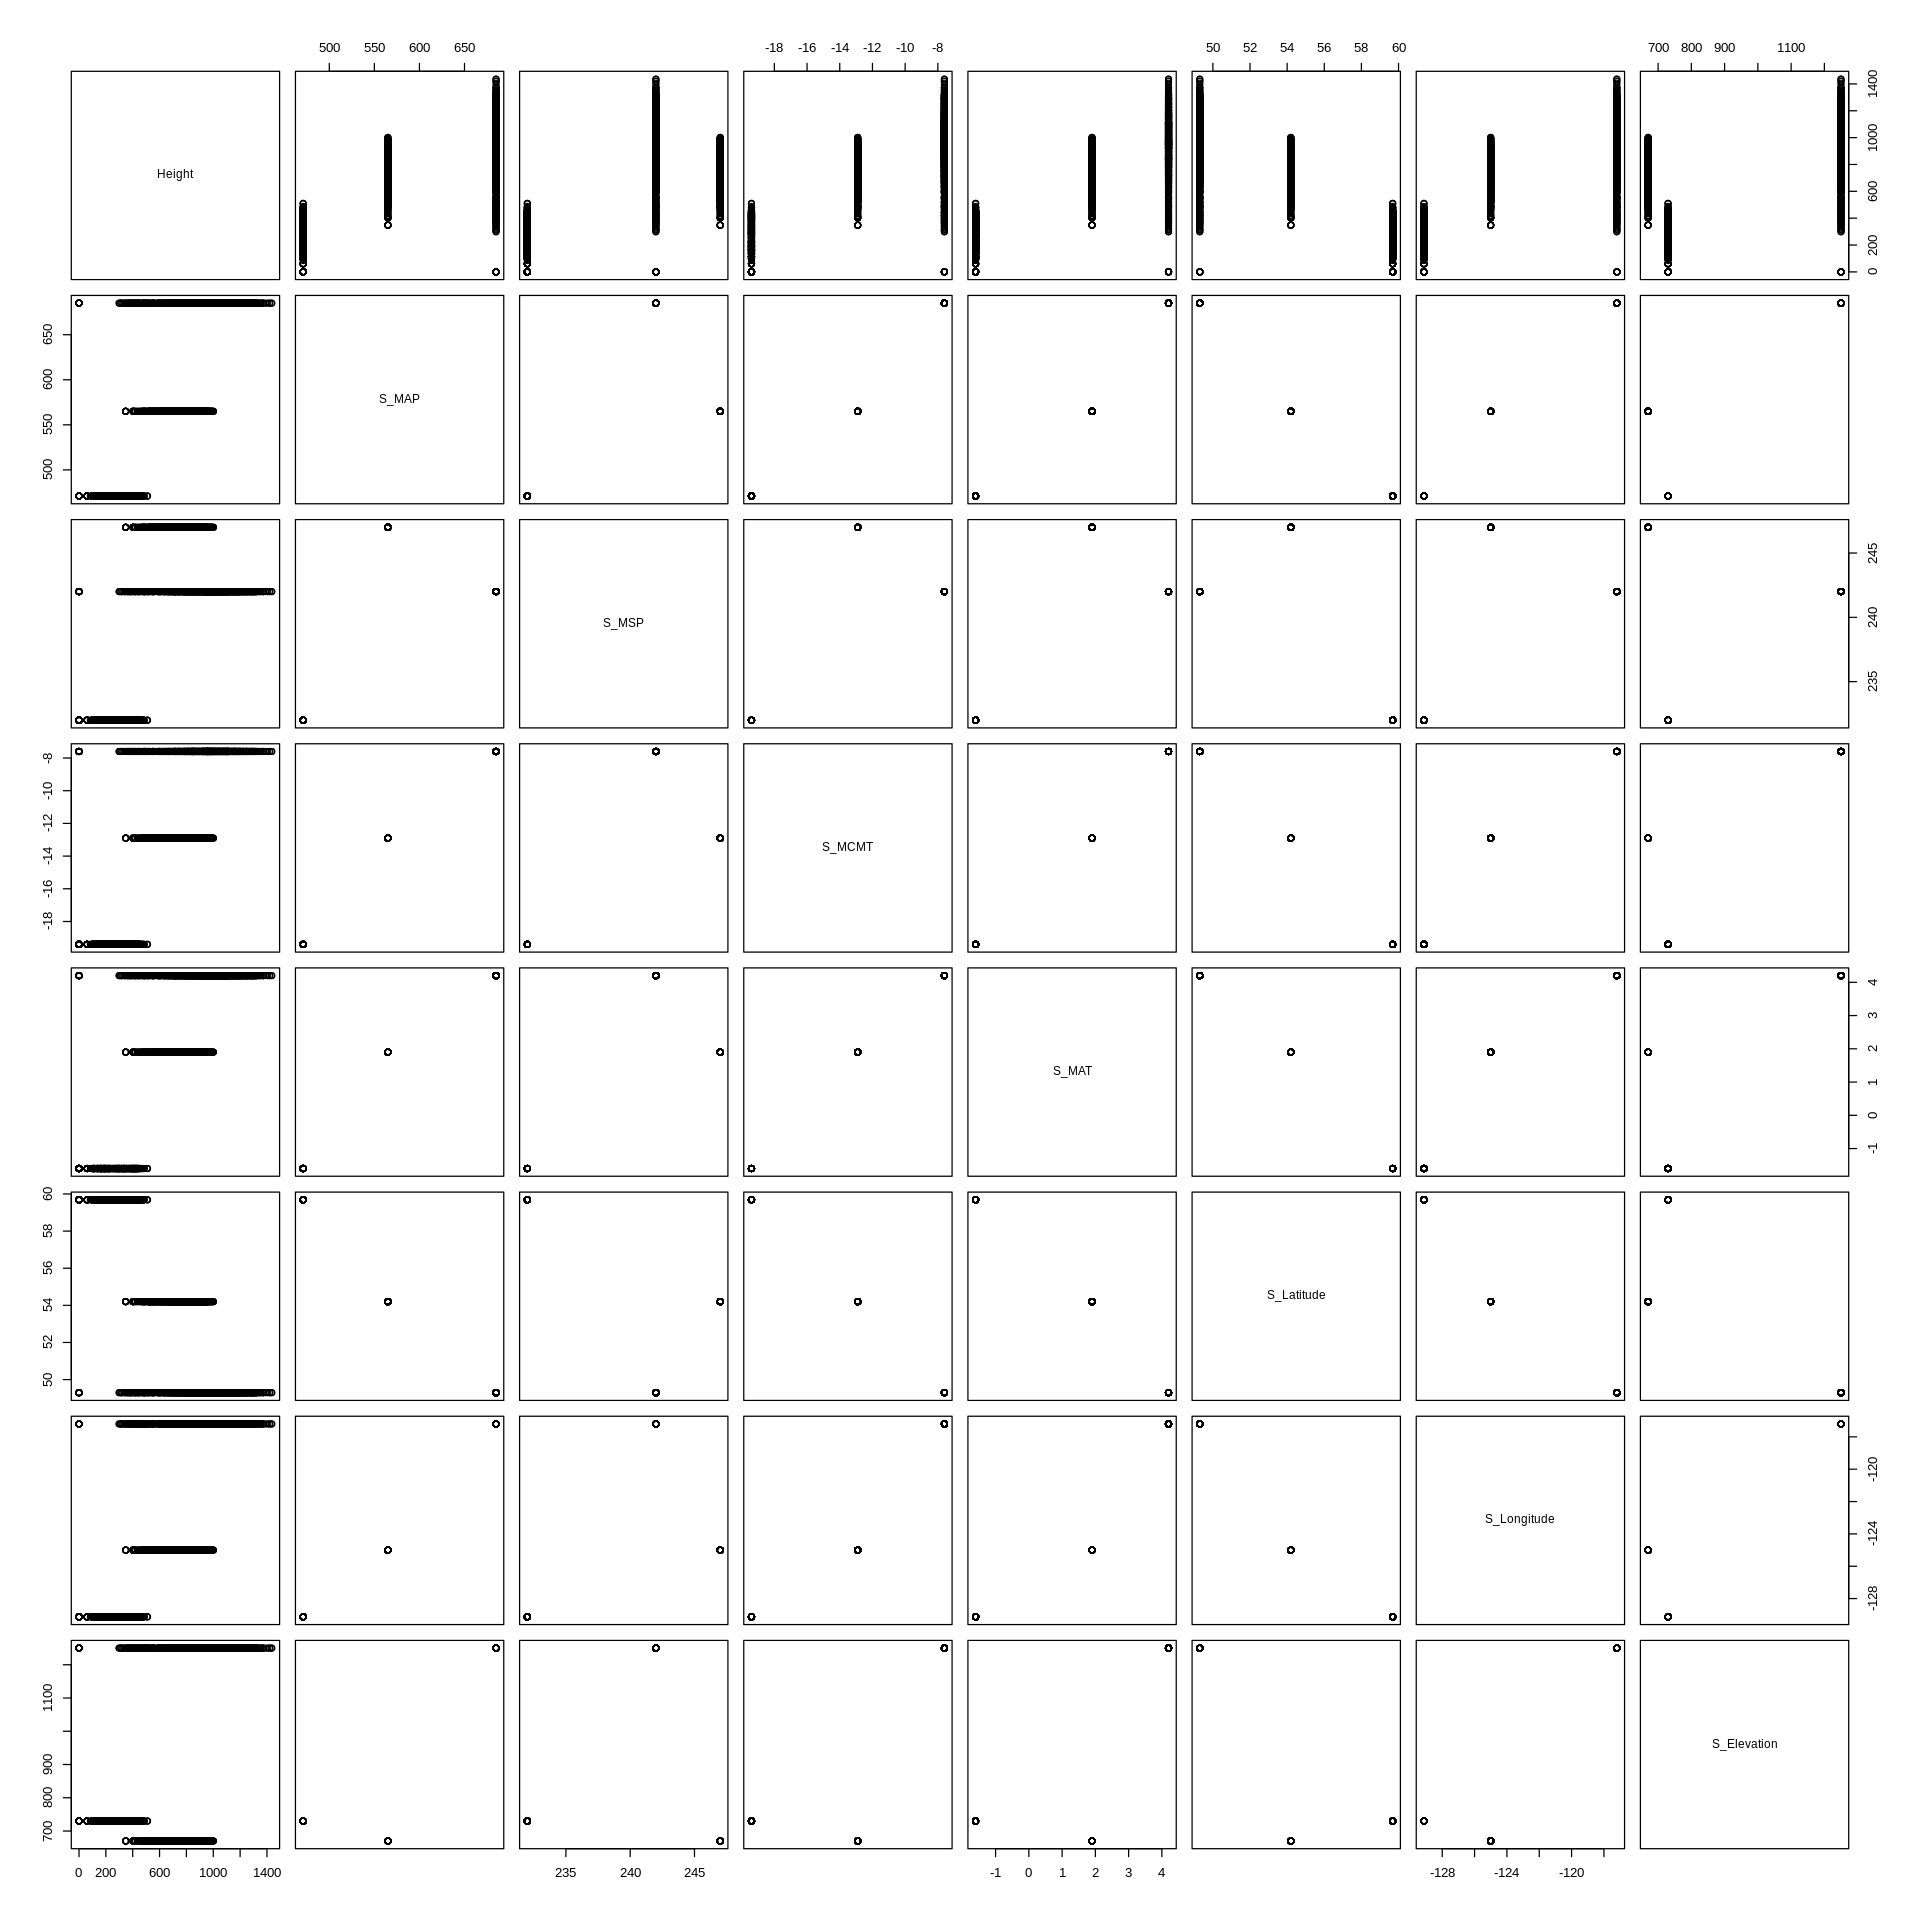

In [13]:
pairs(~ Height + S_MAP + S_MSP + S_MCMT + S_MAT + S_Latitude + S_Longitude + S_Elevation, data = sxData)

In [4]:
model.1 <- lm(Height ~ TX_MCMT + I(TX_MCMT^2), data = sxData)
summary(model.1)


Call:
lm(formula = Height ~ TX_MCMT + I(TX_MCMT^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-594.26 -204.23   28.12  185.00  687.41 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  820.62884    5.52075  148.64   <2e-16 ***
TX_MCMT       19.45572    0.86176   22.58   <2e-16 ***
I(TX_MCMT^2)  -1.78982    0.07085  -25.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 253.5 on 3237 degrees of freedom
Multiple R-squared:  0.4992,	Adjusted R-squared:  0.4989 
F-statistic:  1613 on 2 and 3237 DF,  p-value: < 2.2e-16


In [5]:
model.3 <- lm(Height ~ 
              I(TX_MCMT^2) + 
              I(TX_Lat^2) +
              I(TX_Lat) +
              I(TX_Long^2),
              data = sxData)
summary(model.3)


Call:
lm(formula = Height ~ I(TX_MCMT^2) + I(TX_Lat^2) + I(TX_Lat) + 
    I(TX_Long^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-556.90 -177.72   20.15  165.50  596.31 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  837.54136    5.75654  145.49   <2e-16 ***
I(TX_MCMT^2)  -2.24485    0.06270  -35.80   <2e-16 ***
I(TX_Lat^2)    1.36406    0.12183   11.20   <2e-16 ***
I(TX_Lat)    -31.38647    1.00852  -31.12   <2e-16 ***
I(TX_Long^2)  -1.29661    0.07886  -16.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236 on 3235 degrees of freedom
Multiple R-squared:  0.5665,	Adjusted R-squared:  0.566 
F-statistic:  1057 on 4 and 3235 DF,  p-value: < 2.2e-16


In [6]:
model.2 <- lm(Height ~ 
              I(TX_MCMT^2) + 
              I(TX_Lat^2) +
              I(TX_Lat) +
              I(TX_MAP) + 
              I(TX_MSP^0.5) +
              I(TX_Long^2),
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ I(TX_MCMT^2) + I(TX_Lat^2) + I(TX_Lat) + 
    I(TX_MAP) + I(TX_MSP^0.5) + I(TX_Long^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-560.34 -120.58   22.92  158.22  600.18 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   875.27688   18.02757  48.552  < 2e-16 ***
I(TX_MCMT^2)   -3.70223    0.22229 -16.655  < 2e-16 ***
I(TX_Lat^2)     1.45032    0.24049   6.031 2.30e-09 ***
I(TX_Lat)     -21.46034    2.67512  -8.022 2.89e-15 ***
I(TX_MAP)      -0.05412    0.02919  -1.854   0.0640 .  
I(TX_MSP^0.5)  -1.06079    2.95118  -0.359   0.7193    
I(TX_Long^2)   -0.40792    0.19452  -2.097   0.0362 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 222.2 on 1001 degrees of freedom
  (2232 observations deleted due to missingness)
Multiple R-squared:  0.6356,	Adjusted R-squared:  0.6334 
F-statistic:   291 on 6 and 1001 DF,  p-value: < 2.2e-16


In [7]:
model.2 <- lm(Height ~ 
              I(TX_MCMT^2) +  
              I(TX_Lat^2) +
              I(TX_Lat) +
              I(TX_MAP) + 
              I(TX_MSP^0.5) +
              I(TX_Elev) +
              I(TX_Long),
              data = sxData)
summary(model.2)


# no more than 4 or 5
# mortality: calculate the percentage with different variables.
# also use p variables
# pick one gcm for one climate model -> 4 different ssps.
# climatebc
# spreadsheet import thing and return spreadsheet


Call:
lm(formula = Height ~ I(TX_MCMT^2) + I(TX_Lat^2) + I(TX_Lat) + 
    I(TX_MAP) + I(TX_MSP^0.5) + I(TX_Elev) + I(TX_Long), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-533.71 -127.89   15.67  146.36  486.93 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   902.64764   19.52965  46.219  < 2e-16 ***
I(TX_MCMT^2)   -5.61849    0.26861 -20.917  < 2e-16 ***
I(TX_Lat^2)     3.31349    0.28194  11.752  < 2e-16 ***
I(TX_Lat)     -27.32250    4.33352  -6.305 4.32e-10 ***
I(TX_MAP)      -0.18962    0.03499  -5.419 7.50e-08 ***
I(TX_MSP^0.5)   4.25951    3.63849   1.171    0.242    
I(TX_Elev)      0.25829    0.02922   8.841  < 2e-16 ***
I(TX_Long)    -21.40252    2.72617  -7.851 1.06e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 209.9 on 1000 degrees of freedom
  (2232 observations deleted due to missingness)
Multiple R-squared:  0.6751,	Adjusted R-squared:  0.6728 
F-statistic

In [8]:
model.4 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              TX_MAT + I(TX_MAT^2) +
              TX_MAP + I(TX_MAP^2) +
              TX_MSP + I(TX_MSP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long + I(TX_Long^2) +
              TX_Elev + I(TX_Elev^2),
              data = sxData)
summary(model.4)


Call:
lm(formula = Height ~ TX_MCMT + I(TX_MCMT^2) + TX_MAT + I(TX_MAT^2) + 
    TX_MAP + I(TX_MAP^2) + TX_MSP + I(TX_MSP^2) + TX_Lat + I(TX_Lat^2) + 
    TX_Long + I(TX_Long^2) + TX_Elev + I(TX_Elev^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-548.32 -166.66   11.58  155.60  576.04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.311e+02  6.417e+00 129.513  < 2e-16 ***
TX_MCMT       2.703e+00  3.921e+00   0.689 0.490647    
I(TX_MCMT^2) -3.387e+00  1.938e-01 -17.478  < 2e-16 ***
TX_MAT       -2.472e-01  8.618e+00  -0.029 0.977119    
I(TX_MAT^2)   3.024e+00  8.461e-01   3.574 0.000357 ***
TX_MAP       -1.210e-01  2.630e-02  -4.602 4.34e-06 ***
I(TX_MAP^2)   7.618e-05  1.050e-05   7.255 5.01e-13 ***
TX_MSP        7.806e-01  8.971e-02   8.702  < 2e-16 ***
I(TX_MSP^2)  -1.607e-04  6.829e-05  -2.353 0.018697 *  
TX_Lat       -4.612e+01  4.053e+00 -11.381  < 2e-16 ***
I(TX_Lat^2)   1.603e+00  1.784e-01   8.987  < 2e-16 ***

In [9]:
model.2 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              TX_MAT + I(TX_MAT^2) +
              TX_MAP + I(TX_MAP^2) +
              TX_MSP + I(TX_MSP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long + I(TX_Long^2) +
              TX_Elev + I(TX_Elev^2),
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ TX_MCMT + I(TX_MCMT^2) + TX_MAT + I(TX_MAT^2) + 
    TX_MAP + I(TX_MAP^2) + TX_MSP + I(TX_MSP^2) + TX_Lat + I(TX_Lat^2) + 
    TX_Long + I(TX_Long^2) + TX_Elev + I(TX_Elev^2), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-548.32 -166.66   11.58  155.60  576.04 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.311e+02  6.417e+00 129.513  < 2e-16 ***
TX_MCMT       2.703e+00  3.921e+00   0.689 0.490647    
I(TX_MCMT^2) -3.387e+00  1.938e-01 -17.478  < 2e-16 ***
TX_MAT       -2.472e-01  8.618e+00  -0.029 0.977119    
I(TX_MAT^2)   3.024e+00  8.461e-01   3.574 0.000357 ***
TX_MAP       -1.210e-01  2.630e-02  -4.602 4.34e-06 ***
I(TX_MAP^2)   7.618e-05  1.050e-05   7.255 5.01e-13 ***
TX_MSP        7.806e-01  8.971e-02   8.702  < 2e-16 ***
I(TX_MSP^2)  -1.607e-04  6.829e-05  -2.353 0.018697 *  
TX_Lat       -4.612e+01  4.053e+00 -11.381  < 2e-16 ***
I(TX_Lat^2)   1.603e+00  1.784e-01   8.987  < 2e-16 ***

In [37]:
model.2 <- lm(Height ~ 
              TREE + 
              S_MAT + 
              S_MCMT + 
              S_MAP + 
              S_MSP +
              S_Latitude + 
              S_Longitude + 
              S_Elevation + 
              P_MAT + 
              P_MCMT + 
              P_MAP + 
              P_MSP + 
              P_Elevation + 
              P_Latitude + 
              P_Longitude +
              TX_MAP + 
              TX_MSP + 
              TX_MCMT + 
              TX_MAT + 
              TX_Lat + 
              TX_Long + 
              TX_Elev,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ TREE + S_MAT + S_MCMT + S_MAP + S_MSP + 
    S_Latitude + S_Longitude + S_Elevation + P_MAT + P_MCMT + 
    P_MAP + P_MSP + P_Elevation + P_Latitude + P_Longitude + 
    TX_MAP + TX_MSP + TX_MCMT + TX_MAT + TX_Lat + TX_Long + TX_Elev, 
    data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-603.28  -76.18    6.27   87.12  510.30 

Coefficients: (12 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.684e+03  2.231e+02 -12.031  < 2e-16 ***
TREE        -3.875e-01  9.484e-01  -0.409   0.6829    
S_MAT        4.110e+02  1.749e+01  23.492  < 2e-16 ***
S_MCMT      -1.368e+02  8.687e+00 -15.745  < 2e-16 ***
S_MAP               NA         NA      NA       NA    
S_MSP               NA         NA      NA       NA    
S_Latitude          NA         NA      NA       NA    
S_Longitude         NA         NA      NA       NA    
S_Elevation         NA         NA      NA       NA    
P_MAT        5.

In [28]:
model.2 <- lm(Height ~ 
              P_MAT + 
              P_MCMT + 
              P_MAP + 
              P_MSP + 
              P_Elevation + 
              P_Latitude + 
              P_Longitude + 
              TX_MAP + 
              TX_MSP + 
              TX_MCMT + 
              TX_MAT + 
              TX_Lat + 
              TX_Long + 
              TX_Elev,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ P_MAT + P_MCMT + P_MAP + P_Elevation + 
    P_Latitude + P_Longitude + TX_MAP + TX_MCMT + TX_MAT + TX_Lat + 
    TX_Long + TX_Elev, data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-607.35  -75.95    6.26   86.18  513.25 

Coefficients: (4 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4977.69789  250.41445  19.878  < 2e-16 ***
P_MAT         48.62142    5.66002   8.590  < 2e-16 ***
P_MCMT       155.04481    4.47527  34.645  < 2e-16 ***
P_MAP         -5.31069    0.22315 -23.799  < 2e-16 ***
P_Elevation    0.14009    0.01737   8.064 1.03e-15 ***
P_Latitude    48.35993    2.24736  21.519  < 2e-16 ***
P_Longitude   16.32033    0.69640  23.435  < 2e-16 ***
TX_MAP        -5.23325    0.22355 -23.409  < 2e-16 ***
TX_MCMT      160.22885    4.02104  39.848  < 2e-16 ***
TX_MAT              NA         NA      NA       NA    
TX_Lat              NA         NA      NA       NA    
TX_Long       

In [77]:
model.2 <- lm(Height ~ 
              P_MAT + I(P_MAT^2) +
              P_MAP + 
              TX_MAP + 
              TX_Lat + I(TX_Lat^2) +
              TX_Long + 
              TX_Elev,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ P_MAT + I(P_MAT^2) + P_MAP + TX_MAP + TX_Lat + 
    I(TX_Lat^2) + TX_Long + TX_Elev, data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-491.60  -84.29    4.80   91.90  539.22 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -554.23828   30.21092 -18.346  < 2e-16 ***
P_MAT         61.56306    2.38733  25.787  < 2e-16 ***
I(P_MAT^2)    -1.53377    0.21606  -7.099 1.54e-12 ***
P_MAP          2.02682    0.05826  34.790  < 2e-16 ***
TX_MAP         2.10619    0.05659  37.221  < 2e-16 ***
TX_Lat       -55.28342    1.67190 -33.066  < 2e-16 ***
I(TX_Lat^2)   -0.91614    0.06441 -14.223  < 2e-16 ***
TX_Long      -14.57853    0.68353 -21.328  < 2e-16 ***
TX_Elev       -0.22929    0.01012 -22.653  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138 on 3231 degrees of freedom
Multiple R-squared:  0.8518,	Adjusted R-squared:  0.8514 
F-statistic:  2322 on 8 and 32

In [99]:
model.2 <- lm(Height ~ 
              P_MAT + I(P_MAT^2) +
              P_MAP + 
              TX_MAP + 
              TX_Lat + I((TX_Lat^2 + TX_Long^2)^0.5) +
              TX_Long + 
              TX_Elev,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ P_MAT + I(P_MAT^2) + P_MAP + TX_MAP + TX_Lat + 
    I((TX_Lat^2 + TX_Long^2)^0.5) + TX_Long + TX_Elev, data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-472.76  -77.51    9.73   86.52  525.99 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -528.67538   29.04566 -18.202  < 2e-16 ***
P_MAT                           56.80807    2.31696  24.518  < 2e-16 ***
I(P_MAT^2)                      -1.66416    0.20766  -8.014 1.54e-15 ***
P_MAP                            2.09576    0.05636  37.188  < 2e-16 ***
TX_MAP                           2.15217    0.05456  39.448  < 2e-16 ***
TX_Lat                         -55.74030    1.52543 -36.541  < 2e-16 ***
I((TX_Lat^2 + TX_Long^2)^0.5)  -11.90212    0.56242 -21.162  < 2e-16 ***
TX_Long                        -16.48352    0.62765 -26.262  < 2e-16 ***
TX_Elev                         -0.20987    0.00983 -21.350  < 2e-16 ***
---
Signif. co

In [104]:
model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              I((TX_Lat^2 + TX_Long^2)^0.5),
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ S_MAT + I(S_MAT^2) + P_MAP + I((TX_Lat^2 + 
    TX_Long^2)^0.5), data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-826.01  -84.16   13.51   92.94  460.45 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   706.924830   6.287789  112.43   <2e-16 ***
S_MAT                         147.938764   2.118505   69.83   <2e-16 ***
I(S_MAT^2)                    -10.449187   0.720256  -14.51   <2e-16 ***
P_MAP                          -0.105255   0.003733  -28.20   <2e-16 ***
I((TX_Lat^2 + TX_Long^2)^0.5) -15.041598   0.602500  -24.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 150.5 on 3235 degrees of freedom
Multiple R-squared:  0.8238,	Adjusted R-squared:  0.8235 
F-statistic:  3780 on 4 and 3235 DF,  p-value: < 2.2e-16


In [107]:
model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ S_MAT + I(S_MAT^2) + P_MAP + TX_Lat + TX_Long, 
    data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-682.57  -80.06    7.61   94.12  445.48 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 565.861614   5.991040   94.45   <2e-16 ***
S_MAT       140.741208   2.100313   67.01   <2e-16 ***
I(S_MAT^2)   -7.252129   0.706558  -10.26   <2e-16 ***
P_MAP        -0.060591   0.004142  -14.63   <2e-16 ***
TX_Lat      -23.827716   0.739673  -32.21   <2e-16 ***
TX_Long     -15.338818   0.653068  -23.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 142.8 on 3234 degrees of freedom
Multiple R-squared:  0.8412,	Adjusted R-squared:  0.8409 
F-statistic:  3426 on 5 and 3234 DF,  p-value: < 2.2e-16


In [111]:
model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              TX_MAP + I(TX_MAP^2) +
              TX_Lat + 
              TX_Long,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ S_MAT + I(S_MAT^2) + TX_MAP + I(TX_MAP^2) + 
    TX_Lat + TX_Long, data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-691.06  -77.14    6.45   91.74  446.54 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.345e+02  4.922e+00 108.587  < 2e-16 ***
S_MAT        1.388e+02  2.101e+00  66.075  < 2e-16 ***
I(S_MAT^2)  -7.464e+00  7.083e-01 -10.538  < 2e-16 ***
TX_MAP       3.945e-02  1.087e-02   3.629 0.000289 ***
I(TX_MAP^2) -8.485e-06  4.033e-06  -2.104 0.035477 *  
TX_Lat      -2.430e+01  7.729e-01 -31.442  < 2e-16 ***
TX_Long     -1.533e+01  6.527e-01 -23.483  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 142.8 on 3233 degrees of freedom
Multiple R-squared:  0.8414,	Adjusted R-squared:  0.8411 
F-statistic:  2859 on 6 and 3233 DF,  p-value: < 2.2e-16


In [3]:
model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              TX_MAP + I(TX_MAP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long,
              data = sxData)
summary(model.2)


Call:
lm(formula = Height ~ S_MAT + I(S_MAT^2) + TX_MAP + I(TX_MAP^2) + 
    TX_Lat + I(TX_Lat^2) + TX_Long, data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-721.74  -69.92    4.56   84.63  430.76 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.659e+02  4.918e+00 115.061   <2e-16 ***
S_MAT        1.382e+02  1.986e+00  69.559   <2e-16 ***
I(S_MAT^2)  -7.219e+00  6.696e-01 -10.782   <2e-16 ***
TX_MAP       9.215e-02  1.062e-02   8.680   <2e-16 ***
I(TX_MAP^2)  6.788e-06  3.890e-06   1.745   0.0811 .  
TX_Lat      -1.384e+01  9.036e-01 -15.312   <2e-16 ***
I(TX_Lat^2) -1.207e+00  6.131e-02 -19.683   <2e-16 ***
TX_Long     -1.147e+01  6.473e-01 -17.717   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 134.9 on 3232 degrees of freedom
Multiple R-squared:  0.8584,	Adjusted R-squared:  0.8581 
F-statistic:  2799 on 7 and 3232 DF,  p-value: < 2.2e-16
